# Leukemia detection  Challenge (under development)
The objective of this challenge is to classify patients between leukemia or not.
## Basic info
© Tiago Tamagusko (tamagusko@gmail.com)  
Version: [CHANGELOG.md](/CHANGELOG.md)  
Project Page: <a href="https://github.com/tamagusko/jest20201">https://github.com/tamagusko/jest20201</a>  
License: [LICENSE](/LICENSE)

## Study Structure
1. Problem definition; 
2. Data collection (provided by [1]);
3. Data preparation;
4. Algorithms evaluation;
5. Improvements;
6. Results.

## Project data structure:
    
    ├── LeukemiaDetect.ipynb             # Python code
    ├── CHANGELOG.md                     # Project change log
    ├── LICENSE.md                       # License
    ├── README.md                        # Home
    ├── requirements.txt                 # Project requirements
    ├── data                             # Data (raw and processed)
    ├── reports                          # Outputs

## Future developments
- **Write...**

## 1. Problem
Classify a group of patients as having leukemia (1) and without leukemia (0).
### 1.1 Proposal
Test various Machine Learning (ML) algorithms to try to predict leukemia patients. The dataset is provided with indicators taken from blood tests.
## 2. Data collection
The data was collected and prepared by José Rodrigues [1].
### 2.1 Dataset - [Leukemya_data.csv](https://raw.githubusercontent.com/spingegod/ProjetoTI_part2/master/Leukemya_data.csv) [1]
- 178 patients; *Note: 128 train, 50 test/predict*
- 186 features. *Note: reduce*

### 2.2 Labels -  [labels.csv](https://raw.githubusercontent.com/spingegod/ProjetoTI_part2/master/labels.csv) [1]
- labels of the first 128 patients;
- label 1: Without leukemia. *Note: Changed to 0*
- label 2: With leukemia; *Note: Changed to 1*


# 3. Data Preparation

In [88]:
# Import needed libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

TODAY = dt.datetime.now().strftime('%y%m%d')

# import Machine Learning Algorithms
# from sklearn.tree import DecisionTreeClassifier, plot_tree

## 3.1 Download datasets

In [109]:
# Reading dataset developed by [1]

urlBase = 'https://raw.githubusercontent.com/spingegod/ProjetoTI_part2/master/Leukemya_data.csv'
urlLabels = 'https://raw.githubusercontent.com/spingegod/ProjetoTI_part2/master/labels.csv'


def getData(url):
    # only works with csv files (without head)
    df = pd.read_csv(url, header=None)
    return df


def saveData(df, folder='', name='temp'):
    # only works with csv files (add format parameter if necessary)
    # you can enter the entire path to the folder
    if folder == 'raw': folder='data/raw/'
    elif folder == 'processed': folder='data/processed/'
    elif folder == 'results': folder='results/'
    return df.to_csv(folder + str(TODAY) + '_' + name + '.csv')


data = getData(urlBase)
labels = getData(urlLabels)

# changing the labels to 0 and 1
labels = labels.add(-1)

# save raw data
saveData(data, 'raw', 'Leukemya_data')
saveData(labels, 'raw'  , 'labels')

## 3.2 Quick Data visualization

In [70]:
# data
data.shape

(178, 186)

In [71]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
0,0.64807,0.16853,-0.94017,0.57049,0.68297,0.17221,0.58435,0.071430,-1.440000,1.3522,...,1.01970,2.25020,0.27855,0.072376,0.23319,0.111960,1.1186,-0.22746,0.17707,0.161520
1,0.45781,0.24661,0.46806,-1.14030,0.35616,0.42955,0.51808,0.105430,0.019104,-1.4821,...,0.51232,0.36102,0.32950,0.219020,0.17505,0.054870,2.9294,10.62900,0.15601,0.046731
2,0.69736,0.19996,-0.98561,0.42796,0.73483,0.21918,0.55297,0.065897,-1.453600,1.6378,...,1.13520,2.00690,0.28918,0.095388,0.17238,0.053383,2.4876,6.08990,0.15226,0.033556


In [72]:
data.isna().any()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
156    False
157    False
158    False
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
Length: 186, dtype: bool

In [73]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.600470,0.201485,-0.344933,-0.286808,0.632020,0.287540,0.552424,0.082189,-0.824703,0.236309,...,0.472684,1.045795,0.333589,0.129445,0.226955,0.102015,1.492289,3.210325,0.185576,0.133609
std,0.073394,0.031226,0.584300,1.051375,0.100155,0.091728,0.036221,0.014602,0.660501,1.375195,...,0.609301,1.238343,0.066511,0.043993,0.037857,0.029705,1.080864,8.949080,0.042548,0.080806
min,0.376770,0.102720,-1.299800,-1.557600,0.338550,0.088063,0.424760,0.029278,-2.185700,-1.617800,...,-1.979500,-1.331900,0.171240,0.059657,0.149200,0.015450,-0.298160,-1.734000,0.140280,0.000000
25%,0.555767,0.189550,-0.758522,-0.961957,0.584640,0.219670,0.537710,0.075842,-1.261125,-0.724020,...,0.134622,0.280898,0.297960,0.099101,0.206740,0.090722,0.840605,-0.801597,0.163120,0.065188
50%,0.611900,0.204290,-0.479840,-0.466060,0.657045,0.275930,0.561140,0.084887,-0.907755,-0.136530,...,0.538395,0.805355,0.328025,0.119270,0.223460,0.107370,1.384650,0.597150,0.174630,0.110250
75%,0.652925,0.219668,-0.057454,-0.056106,0.705235,0.353475,0.576998,0.090970,-0.515713,0.879875,...,0.816458,1.562375,0.368625,0.150257,0.249032,0.121952,1.750450,2.135200,0.185935,0.203223
max,0.725140,0.277860,1.878300,5.181600,0.801370,0.554790,0.615770,0.108670,1.514800,6.337600,...,2.320500,6.687300,0.604310,0.316170,0.334130,0.156020,6.031600,66.292000,0.359070,0.317360


In [74]:
# labels
labels.head(3)

,0
0,0
1,0
2,0


In [75]:
labels.shape

(128, 1)

In [76]:
labels.isna().any()

0    False
dtype: bool

In [79]:
# total of zeros
labels.isin([0]).sum()

0    111
dtype: int64

In [80]:
# total of ones (positive cases for leukemia)
labels.isin([1]).sum()

0    17
dtype: int64

In [86]:
# percentage of positive
round((labels.isin([1]).sum()/labels.isin([0]).sum())*100, 2)

0    15.32
dtype: float64

**NOTE: Apparently the data has already been cleared. There are no NAN fields in the sample.**

## 3.3 Split data in train/predict

In [43]:
train = data.iloc[0:128, :]
predict = data.iloc[128:, :]

In [42]:
train.shape

(128, 186)

In [44]:
predict.shape

(50, 186)

**NOTE: Is 17 positive in only 128 patients enough? Approach chosen: Feature selection.**

## 3.4 Feature selection
Note: There are 186 features, the ideal is to select only the most relevant ones. Maybe 10 ~ 20 (or less).

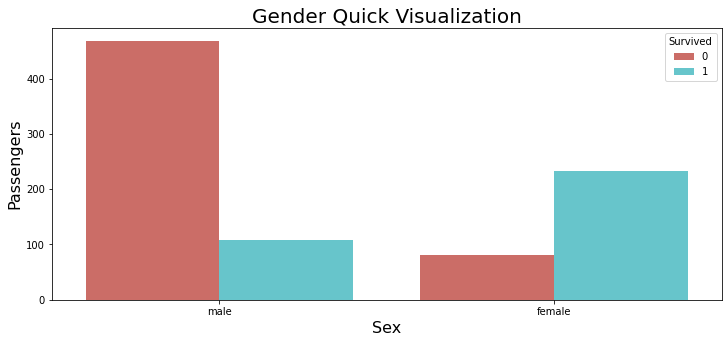

In [4]:
# Plotting the first graph
plt.figure(figsize=(12, 5))

sns.countplot(x='Sex', data=train, palette="hls", hue="Survived")
plt.xlabel("Sex", fontsize=16)
plt.ylabel("Passengers", fontsize=16)
plt.title("Gender Quick Visualization", fontsize=20)
plt.show()

In [5]:
train[["Sex", "Survived"]].groupby(
    ["Sex"], as_index=False).mean()  # visualization by sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


**An important detail can be seen here, the title in people's names.**

In [6]:
# spliting the name and create column title
train['Title'] = train.Name.apply(
    lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
test['Title'] = test.Name.apply(
    lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

**There are 5 main titles: Master, Miss, Mr, Mrs, Officer, Royalty**.

In [7]:
Title_Dictionary = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir":       "Royalty",
    "Countess": "Royalty",
    "Dona":       "Royalty",
    "Lady":      "Royalty",
    "Mme":        "Mrs",
    "Ms":         "Mrs",
    "Mrs":       "Mrs",
    "Mlle":       "Miss",
    "Miss":      "Miss",
    "Mr":        "Mr",
    "Master":    "Master"
}

# map each title to correct category
train['Title'] = train.Title.map(Title_Dictionary)
test['Title'] = test.Title.map(Title_Dictionary)

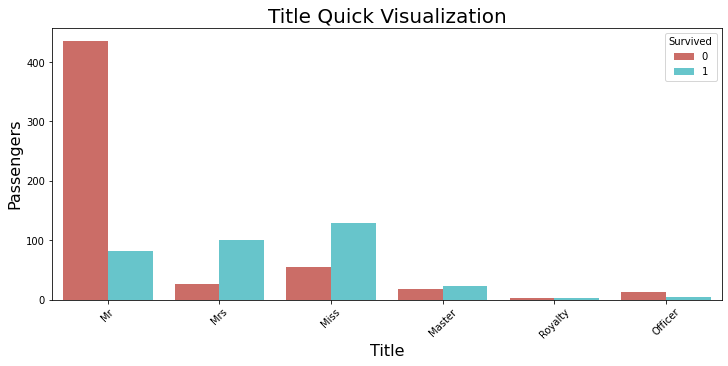

In [8]:
# defining the figure size of our graphic
plt.figure(figsize=(12, 5))

# Plotting the result
sns.countplot(x='Title', data=train, palette="hls", hue="Survived")
plt.xlabel("Title", fontsize=16)  # seting the xtitle and size
plt.ylabel("Passengers", fontsize=16)  # Seting the ytitle and size
plt.title("Title Quick Visualization", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [9]:
train[["Title", "Survived"]].groupby(
    ["Title"], as_index=False).mean()  # visualization by title

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.795276
4,Officer,0.277778
5,Royalty,0.600000


**Women and children first? hmmm. This will be evaluated later.**

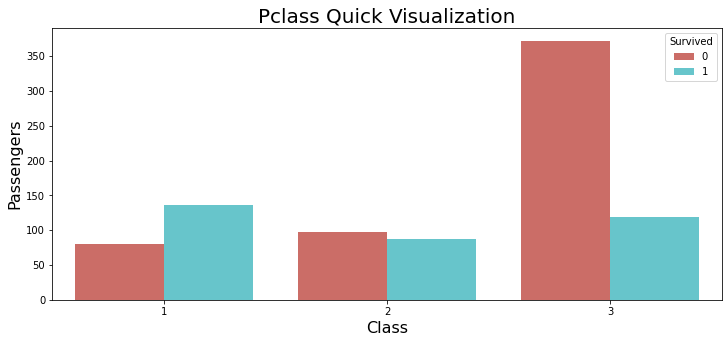

In [10]:
# defining the figure size of our graphic
plt.figure(figsize=(12, 5))

# Plotting the result
sns.countplot(x='Pclass', data=train, palette="hls", hue="Survived")
plt.xlabel("Class", fontsize=16)  # seting the xtitle and size
plt.ylabel("Passengers", fontsize=16)  # Seting the ytitle and size
plt.title("Pclass Quick Visualization", fontsize=20)
plt.show()

In [11]:
train[["Pclass", "Survived"]].groupby(
    ["Pclass"], as_index=False).mean()  # visualization by class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


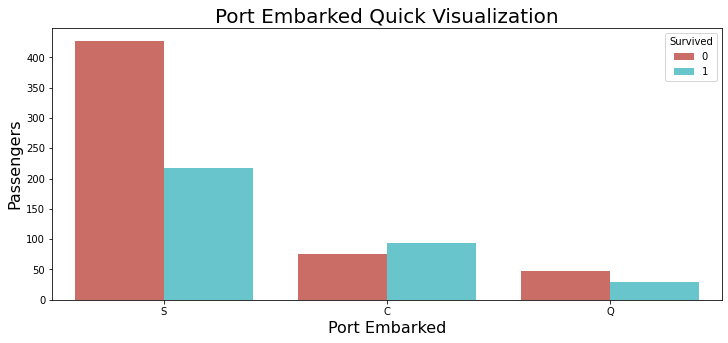

In [12]:
# defining the figure size of our graphic
plt.figure(figsize=(12, 5))

# Plotting the result
sns.countplot(x='Embarked', data=train, palette="hls", hue="Survived")
plt.xlabel("Port Embarked", fontsize=16)  # seting the xtitle and size
plt.ylabel("Passengers", fontsize=16)  # Seting the ytitle and size
plt.title("Port Embarked Quick Visualization", fontsize=20)
plt.show()

In [13]:
train[["Embarked", "Survived"]].groupby(
    ["Embarked"], as_index=False).mean()  # viewing by port you embarked

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<Figure size 864x360 with 0 Axes>

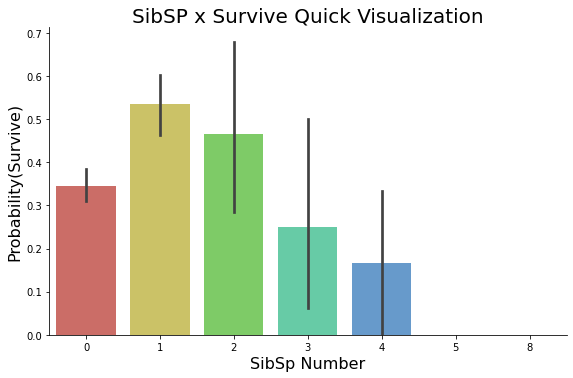

In [14]:
# defining the figure size of our graphic
plt.figure(figsize=(12, 5))

sns.catplot(x="SibSp", y="Survived", data=train,
            kind="bar", height=5, aspect=1.6, palette="hls")
plt.xlabel("SibSp Number", fontsize=16)  # seting the xtitle and size
plt.ylabel("Probability(Survive)", fontsize=16)  # Seting the ytitle and size
plt.title("SibSP x Survive Quick Visualization", fontsize=20)

plt.show()

<Figure size 864x360 with 0 Axes>

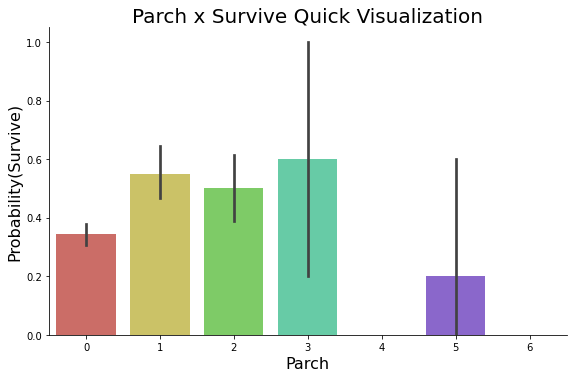

In [15]:
# defining the figure size of our graphic
plt.figure(figsize=(12, 5))

sns.catplot(x="Parch", y="Survived", data=train,
            kind="bar", height=5, aspect=1.6, palette="hls")
plt.xlabel("Parch", fontsize=16)  # seting the xtitle and size
plt.ylabel("Probability(Survive)", fontsize=16)  # Seting the ytitle and size
plt.title("Parch x Survive Quick Visualization", fontsize=20)

plt.show()

<Figure size 864x360 with 0 Axes>

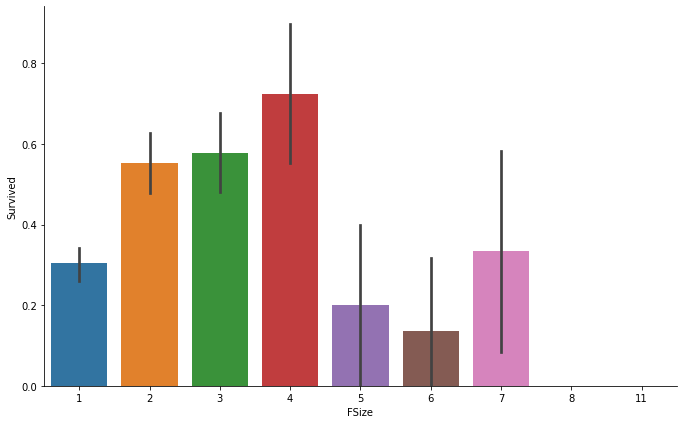

In [16]:
train["FSize"] = train["Parch"] + train["SibSp"] + 1
test["FSize"] = test["Parch"] + test["SibSp"] + 1

plt.figure(figsize=(12, 5))

sns.catplot(x="FSize", y="Survived", data=train,
            kind="bar", height=6, aspect=1.6)
plt.show()

## 3.2 Cleaning dataframes

In [17]:
# Viewing data structure now
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [18]:
# Deleting unnecessary columns for the ML model
train.drop(["PassengerId", "Name", "SibSp", "Parch",
            "Ticket", "Fare", "Cabin"], axis=1, inplace=True)
test.drop(["PassengerId", "Name", "SibSp", "Parch",
           "Ticket", "Fare", "Cabin"], axis=1, inplace=True)

In [19]:
# Viewing training data after deleting unused columns
train.head()  # viewing training dataframe

,Survived,Pclass,Sex,Age,Embarked,Title,FSize
0,0,3,male,22.0,S,Mr,2
1,1,1,female,38.0,C,Mrs,2
2,1,3,female,26.0,S,Miss,1
3,1,1,female,35.0,S,Mrs,2
4,0,3,male,35.0,S,Mr,1


In [20]:
# Viewing the missing data
train.isnull().sum().sort_values(ascending=False)  # sum the null fields

Age         177
Embarked      2
FSize         0
Title         0
Sex           0
Pclass        0
Survived      0
dtype: int64

In [21]:
test.isnull().sum().sort_values(ascending=False)  # sum the null fields

Age         86
FSize        0
Title        0
Embarked     0
Sex          0
Pclass       0
dtype: int64

Fields with values other than zero must be treated.
So the idea is:
- For the Age (by group) and Fare fields, the average values for the empty fields will be adopted.
- For the Embarked field, the port with the most origins will be used.

In [22]:
# Replacing missing embarked values with port with most values - Southampton (S)
train['Embarked'].fillna(train['Embarked'].mode()[0],
                         inplace=True)  # only in train dataframe
# Replacing missing age values with average age
age_group = train.groupby(["Sex", "Pclass", "Title"])[
    "Age"]  # group age by sex, class, and title
train.loc[train.Age.isnull(), 'Age'] = train.groupby(
    ['Sex', 'Pclass', 'Title']).Age.transform('median')
test.loc[test.Age.isnull(), 'Age'] = train.groupby(
    ['Sex', 'Pclass', 'Title']).Age.transform('median')
# Replacing missing fare value with average fare
# test['Fare'].fillna(test['Fare'].mean(), inplace=True)  # only in test dataframe

**Taking a look at the data again.**

In [23]:
train.isnull().sum().sort_values(ascending=False)

FSize       0
Title       0
Embarked    0
Age         0
Sex         0
Pclass      0
Survived    0
dtype: int64

In [24]:
# Viewing missing values again
test.isnull().sum().sort_values(ascending=False)

FSize       0
Title       0
Embarked    0
Age         0
Sex         0
Pclass      0
dtype: int64

In [25]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,FSize
0,0,3,male,22.0,S,Mr,2
1,1,1,female,38.0,C,Mrs,2
2,1,3,female,26.0,S,Miss,1
3,1,1,female,35.0,S,Mrs,2
4,0,3,male,35.0,S,Mr,1


**Machine Learning models understand numbers only. So we have to do something about it.**
## 3.3 Data Formating

In [26]:
# Converting values to numbers
embarkedMap = {"S": 0, "C": 1, "Q": 2}
genderMap = {"male": 0, "female": 1}
titleMap = {"Mr": 1, "Miss": 2, "Mrs": 3,
            "Master": 4, "Officer": 5, "Royalty": 6}

train['Sex'] = train.Sex.map(genderMap)
test['Sex'] = test.Sex.map(genderMap)

train['Age'] = train.Age.astype(int)  # transform in a int

train['Embarked'] = train.Embarked.map(embarkedMap)
test['Embarked'] = test.Embarked.map(embarkedMap)

train['Title'] = train.Title.map(titleMap)
test['Title'] = test.Title.map(titleMap)

train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,FSize
0,0,3,0,22,0,1,2
1,1,1,1,38,1,3,2
2,1,3,1,26,0,2,1
3,1,1,1,35,0,3,2
4,0,3,0,35,0,1,1


#### 4. Algorithms evaluation
## 4.1 Decision Tree Algorithm

In [27]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,FSize
0,0,3,0,22,0,1,2
1,1,1,1,38,1,3,2
2,1,3,1,26,0,2,1
3,1,1,1,35,0,3,2
4,0,3,0,35,0,1,1


In [28]:
# Separating features from labels
x_train = train.drop('Survived', axis=1).values  # features
y_train = train['Survived']  # labels / targets

# Creates the Decision Tree model
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(x_train, y_train)
decision_tree.score(x_train, y_train)

0.8237934904601572

In [29]:
# Loading the model into the test data
x_test = test.values
y_pred = decision_tree.predict(x_test)

# Create a CSV with results
submission = pd.DataFrame(pd.read_csv("data/test.csv")['PassengerId'])
submission["Survived"] = y_pred
submission.to_csv('reports/DecisionTree.csv', index=False)

## Decision Tree View

[Text(418.5, 380.52, 'node #0\nTitle <= 1.5\ngini = 0.473\nsamples = 100.0%\nvalue = [0.616, 0.384]\nclass = Died'),
 Text(209.25, 271.8, 'node #1\nPclass <= 1.5\ngini = 0.264\nsamples = 58.0%\nvalue = [0.843, 0.157]\nclass = Died'),
 Text(104.625, 163.07999999999998, 'node #2\nAge <= 38.5\ngini = 0.452\nsamples = 12.0%\nvalue = [0.654, 0.346]\nclass = Died'),
 Text(52.3125, 54.360000000000014, 'node #3\ngini = 0.5\nsamples = 4.7%\nvalue = [0.5, 0.5]\nclass = Died'),
 Text(156.9375, 54.360000000000014, 'node #4\ngini = 0.371\nsamples = 7.3%\nvalue = [0.754, 0.246]\nclass = Died'),
 Text(313.875, 163.07999999999998, 'node #5\nAge <= 32.5\ngini = 0.192\nsamples = 46.0%\nvalue = [0.893, 0.107]\nclass = Died'),
 Text(261.5625, 54.360000000000014, 'node #6\ngini = 0.215\nsamples = 34.9%\nvalue = [0.878, 0.122]\nclass = Died'),
 Text(366.1875, 54.360000000000014, 'node #7\ngini = 0.114\nsamples = 11.1%\nvalue = [0.939, 0.061]\nclass = Died'),
 Text(627.75, 271.8, 'node #8\nFSize <= 4.5\ngini

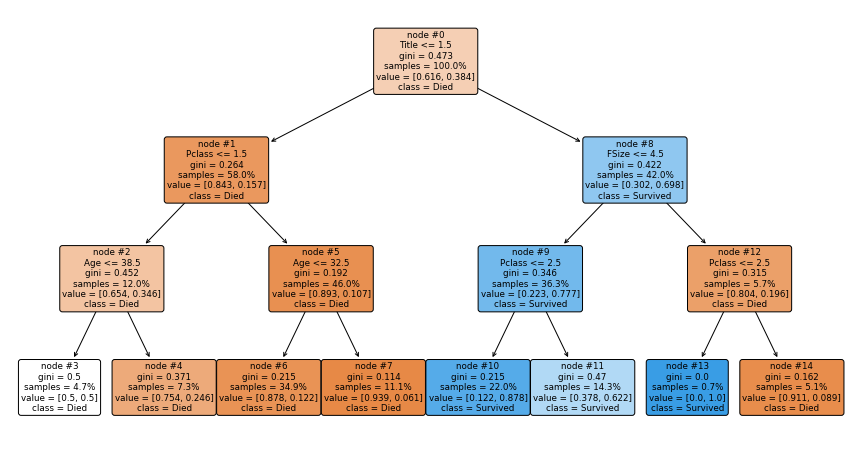

In [30]:
plt.figure(figsize=(15, 8))
plot_tree(decision_tree,
          max_depth=3,
          impurity=True,
          feature_names=list(train.drop(['Survived'], axis=1)),
          class_names=['Died', 'Survived'],
          node_ids=True,
          proportion=True,
          rounded=True,
          filled=True)  # feature_names=y_pred, class_names=x_test,

## 4.2 Random Forest Algorithm

# 5. Improvements

# 6. Results

# Citation
Tamagusko, T. (2020). Initiation Project JEST 2020/1. Part 2. Retrieved from https://github.com/tamagusko/jest20201  
## References <a id="ref"></a>
[1] Dataset to support the study. (2020, May 31). Retrieved from https://github.com/spingegod/ProjetoTI_part2